In [1]:
## Found at https://stackoverflow.com/questions/8032642/how-to-obtain-image-size-using-standard-python-class-without-using-external-lib

import struct
import imghdr

def get_image_size(fname):
    '''Determine the image type of fhandle and return its size.
    from draco'''
    with open(fname, 'rb') as fhandle:
        head = fhandle.read(24)
        if len(head) != 24:
            return
        if imghdr.what(fname) == 'png':
            check = struct.unpack('>i', head[4:8])[0]
            if check != 0x0d0a1a0a:
                return
            width, height = struct.unpack('>ii', head[16:24])
        elif imghdr.what(fname) == 'gif':
            width, height = struct.unpack('<HH', head[6:10])
        elif imghdr.what(fname) == 'jpeg':
            try:
                fhandle.seek(0) # Read 0xff next
                size = 2
                ftype = 0
                while not 0xc0 <= ftype <= 0xcf:
                    fhandle.seek(size, 1)
                    byte = fhandle.read(1)
                    while ord(byte) == 0xff:
                        byte = fhandle.read(1)
                    ftype = ord(byte)
                    size = struct.unpack('>H', fhandle.read(2))[0] - 2
                # We are at a SOFn block
                fhandle.seek(1, 1)  # Skip `precision' byte.
                height, width = struct.unpack('>HH', fhandle.read(4))
            except Exception: #IGNORE:W0703
                return
        else:
            return
        return width, height

In [5]:
import os
image_sizes = []

character_image_files = os.listdir('/home/jordan/saltybetdata/scraping_scripts/character_images/')

for character_image_file in character_image_files:
    image_sizes.append((character_image_file.split('.gif')[0], get_image_size('/home/jordan/saltybetdata/scraping_scripts/character_images/' + character_image_file)))

In [6]:
import numpy as np
import seaborn as sns
sns.set()

image_matrix = np.array([[int(x[0]), x[1][0], x[1][1]] for x in image_sizes if x[1] != None])

In [7]:
import pandas as pd

character_image_df = pd.DataFrame(image_matrix, columns=['CharacterId', 'Width', 'Height'], dtype=int)
character_image_df = character_image_df.set_index('CharacterId')

chararacter_image_df = character_image_df[(~character_image_df['Width'].isnull())&(~character_image_df['Height'].isnull())]

In [9]:
character_info = []

with open('/home/jordan/saltybetdata/scraping_scripts/character_information.txt') as input_file:
    for line in input_file:
        print(line)
        if '|||\n' in line:
            print('OUT BRUH')
        elif 'by\n' in line:
            character_info.append([int(line.split('|||')[0]), line.split('|||')[1].split(' by\n')[0], ''])
        else:
            character_info.append([int(line.split('|||')[0]), line.split('|||')[1].split(' by ')[0], ' by '.join(line.split(' by ')[1:]).replace('\n', '')])
        
    

1|||Mr. bison by Vk, updated by terry kuo, adapted by tenebrous

2|||Bullseye by Doom & o ilusionista

3|||Elecman by O ilusionista & akitosama

4|||Ooze-o by O ilusionista

5|||Shin kazuma by O ilusionista

6|||Mexican typhoon by O ilusionista

7|||Zangief maskered by O ilusionista

8|||Predalien by Josipknezovicz

9|||Eva-00 by Tonyadv

10|||009 by Hiro

11|||Gato by Tin

12|||Victor by Tin

13|||Eva-01 by Tonyadv

14|||

OUT BRUH
15|||Eva-03 by Tonyadv

16|||Eva-05 by Tonyadv

17|||Captain caveman by Ddr

18|||Dodgers by Tronboone

19|||Billy lee by (^o^)

20|||Jimmy lee by (^o^)

21|||Opera elmer by Ddr

22|||Fatter Albert by Ddr

23|||Fat albert by Tronboone

24|||Marvin the martian by Ddr

25|||Marvin by Telechy

26|||Momasusta by Ddr

27|||The Sailor Man by Tronbonne

28|||Sent by Zolagun

29|||Sho nuff by Txpot & ddr

30|||Underdog by Ddr

31|||1.0 by Woman

32|||Mario by 119way, gmspectre & winodds & mengbin9

33|||Cocodrilo by

34|||Mr1 daz bones by

35|||Mr2.bon kure by

36|

OUT BRUH
2887|||

OUT BRUH
2888|||

OUT BRUH
2889|||

OUT BRUH
2890|||

OUT BRUH
2891|||

OUT BRUH
2892|||

OUT BRUH
2893|||

OUT BRUH
2894|||

OUT BRUH
2895|||

OUT BRUH
2896|||

OUT BRUH
2897|||

OUT BRUH
2898|||

OUT BRUH
2899|||

OUT BRUH
2900|||

OUT BRUH
2901|||

OUT BRUH
2902|||

OUT BRUH
2903|||

OUT BRUH
2904|||

OUT BRUH
2905|||

OUT BRUH
2906|||

OUT BRUH
2907|||

OUT BRUH
2908|||

OUT BRUH
2909|||

OUT BRUH
2910|||

OUT BRUH
2911|||

OUT BRUH
2912|||

OUT BRUH
2913|||

OUT BRUH
2914|||

OUT BRUH
2915|||

OUT BRUH
2916|||

OUT BRUH
2917|||

OUT BRUH
2918|||

OUT BRUH
2919|||

OUT BRUH
2920|||

OUT BRUH
2921|||

OUT BRUH
2922|||

OUT BRUH
2923|||

OUT BRUH
2924|||

OUT BRUH
2925|||

OUT BRUH
2926|||

OUT BRUH
2927|||

OUT BRUH
2928|||

OUT BRUH
2929|||

OUT BRUH
2930|||

OUT BRUH
2931|||

OUT BRUH
2932|||

OUT BRUH
2933|||

OUT BRUH
2934|||

OUT BRUH
2935|||

OUT BRUH
2936|||

OUT BRUH
2937|||

OUT BRUH
2938|||

OUT BRUH
2939|||

OUT BRUH
2940|||

OUT BRUH
2941|||

OUT BRUH
2

5655|||Juralian by Mizukuraido

5656|||Jurarus by Mizukuraido

5657|||Kaiba seto by Ju

5658|||CirnoJ by Pre-to

5659|||Marisa EX by Pre-to

5660|||Saber EX by Juke kisaragi

5661|||K EX by Ikaruga

5662|||Makoto kikuchi K by Fu-lin

5663|||K-series by 1%

5664|||Masked rider kabuto by Qzak

5665|||Kaguya houraisan EX by G-sho

5666|||Kaisensei ken by Polocolto and marancv

5667|||Kamijo toma EX by Otika

5668|||Kamishiro_aya by Rel+macbeth

5669|||Kamishiro_kunagi by Yuuki+macbeth

5670|||Kamui tenrou by Kagetsu yuki

5671|||Kana orikura by Nyankiryu

5672|||Kanade by Nenmin

5673|||Kanoko hosokawa by Sakuraka

5674|||Kaname madoka EX by

5675|||Kangaroo by Uji

5676|||Kaori&shiori EX by Rekku

5677|||Hanayama by Tokage

5678|||Karai by The great matsutzu

5679|||Karate kenji dhq by Ahuron

5680|||Kasai by Humi

5681|||Kasen EX by Hetyo

5682|||Kat by Daigoro

5683|||Katima by Z.a.i.

5684|||Kawashima-san by Fu-lin

5685|||Kazuma EX by Vcun

5686|||Kazuya by Seki-rou

5687|||Shishimar


8102|||Asuras by Simotsuki

8103|||Asura by Ahuron

8104|||Asutorea EX3 by Sankiti

8105|||Athena EX3 by Aomura

8106|||Athena fake by Ibukah

8107|||Athena945 by Sekirei

8108|||Athena asamiya EX3 by Ahuron

8109|||Aty by Act02

8110|||Tyrant_a by Muu

8111|||Ultraseven_a by Muu

8112|||Ultraman dyna_a by Muu

8113|||Ultraman gaia_a by Muu

8114|||Ultraman jack_a by Muu

8115|||Ultraman tarou_a by Muu

8116|||Ultraman tiga_a by Muu

8117|||Kyoso(n-cube ai) by Elecbyte

8118|||Avdol by Izumo

8119|||Avdul by Nimame

8120|||Awakened torao by Nhk

8121|||Awaken satsuki by Syacho-

8122|||Axel by Ruina&azuma

8123|||Axel stone by Xdxdav

8124|||Ayako by Aomura

8125|||Ayatsuji tsukasa EX3 by Ouchi

8126|||

OUT BRUH
8127|||Shameimaru by Amzak

8128|||Ayu&misuzu&mizuka by Rekku

8129|||Kagami EX3 by Hal

8130|||Basilisk-s[0.98] EX3 by Nankotsu_curry

8131|||Baki-hanma EX3 by Tokage

8132|||Baki-hanma ex by Tokage

8133|||Balrog EX3 by Lord sinistro

8134|||Balrog_a by Felicity

8135|||Bao

11087|||M_hotaru by Milky

11088|||Nariyuki by Keyi thunemathu

11089|||Naruhodokun by Happa

11090|||Nopeunaga by Zako

11091|||D4 rider by Rioriot

11092|||Sandra by Ikaruga

11093|||Skolldir by Herttainenspade

11094|||Ss6 syunran-abab by Suigin

11095|||Steed by Lifeend

11096|||Takahashi_genjin by Anamochi

11097|||Tfk by Y&m

11098|||Toudou by Zako

11099|||Terraria warrior by Nam boss

11100|||Lucia fernandez by On.off & fervicante

11101|||Yukina himeragi by Rakurai

11102|||Zagan by Nankotsu_curry

11103|||Mb-01 by O ilusionista and ethan lives

11104|||Fake kaede by Ohgaki

11105|||8th angel by Tonyadv

11106|||Blanka 0d by (^o^)

11107|||Luna papa by Papitto

11108|||Balrog 0d by (^o^)

11109|||Enya the hag by Corntortillas

11110|||Berserker f/sn by Choiya-

11111|||Frisk by ×·

11112|||Raiden 512e1 by Hotate

11113|||Gilgamesh sd by ×·

11114|||Temjin 747j by Hotate

11115|||

OUT BRUH
11116|||A-shimo by Aaa

11117|||Weiss by ~}@

11118|||Adelheid xiii by Dls

11119|||Adre

In [10]:
character_info_df = pd.DataFrame(character_info, columns=['CharacterId', 'Name', 'Author'])
character_info_df = character_info_df.set_index('CharacterId')

In [11]:
# Join these two together

joined_dataset = character_info_df.join(character_image_df, on='CharacterId', rsuffix='_image')
joined_dataset.head()

,Name,Author,Width,Height
CharacterId,,,,
1,Mr. bison,"Vk, updated by terry kuo, adapted by tenebrous",122.0,99.0
2,Bullseye,Doom & o ilusionista,86.0,113.0
3,Elecman,O ilusionista & akitosama,94.0,80.0
4,Ooze-o,O ilusionista,93.0,125.0
5,Shin kazuma,O ilusionista,66.0,94.0


# Load Match Information

In [24]:
match_results = []

for match_file in os.listdir('/home/jordan/saltybetdata/scraping_scripts/match_results/'):
    with open('/home/jordan/saltybetdata/scraping_scripts/match_results/' + match_file) as input_file:
        match_result = input_file.read().split('\n')[0:2]
        if len(match_result) == 2:
            try:
                first_competitor = match_result[0].split(' vs ')[0]
                second_competitor = match_result[0].split(' vs ')[1].split(' at ')[0]
                winner = match_result[1][8:]
                if first_competitor == winner:
                    winner_id = 'Red'
                elif second_competitor == winner:
                    winner_id = 'Blue'
                else:
                    winner_id = 'N/A'
                    
                match_id = match_file.split('_')[2].split('.t')[0]
                match_results.append([int(match_id), first_competitor, second_competitor, winner_id])
            except Exception as e:
                print(e)
                print(match_result)
            
match_results

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

[[500997, 'Stickykeys', 'Farco lombardi', 'Red'],
 [767691, 'Jureimen', 'Bloodsurge-corpse', 'Blue'],
 [881223, 'Tarantula', 'Ditto', 'Red'],
 [248665, 'Dao-long', 'Cockle', 'Blue'],
 [75799, 'Crane', 'Popura', 'Blue'],
 [585184, 'Syaoran', 'Don patch', 'Blue'],
 [764313, 'Alien metron', 'Shandera-k', 'Red'],
 [765059, 'Jumbo ozaki', 'Sannomiya_shiho', 'Red'],
 [452006, 'Shiro_kishi', 'Rober pasta', 'Red'],
 [29450, 'Sodom', 'Sissy', 'Blue'],
 [328467, 'Gn-pioneer', 'Chaos satellite', 'Red'],
 [400207, 'Koakuma_ac', 'Anakaris', 'Red'],
 [945041, 'Anna ex', 'Sheng long', 'Red'],
 [833478, 'Tsubasa', 'Sailor chibi moon', 'Blue'],
 [676061, 'Pickle', 'Terry_ff3rb', 'Blue'],
 [432304, 'Existence-less', 'Super metroid', 'Red'],
 [395623, 'Labyrinth 1p', 'Silversamurai', 'Red'],
 [127821, 'Sonia rotd', 'Footee', 'Red'],
 [144039, 'Sakura haruno nzc', 'Clayface', 'Red'],
 [1003011, 'Dizzy wsl', 'Clarice di lanza', 'Blue'],
 [939068, 'R-mai', 'Heat man', 'Red'],
 [101175, 'Madotsuki', 'Chris s

In [25]:
match_df = pd.DataFrame(match_results, columns=['MatchId', 'Red', 'Blue', 'WinnerId'])

In [26]:
len(match_df)

946172

In [27]:
match_df = match_df[(match_df['Red'].isin(joined_dataset['Name']))&(match_df['Blue'].isin(joined_dataset['Name']))]
len(match_df)

844499

In [28]:
match_df['RedWidth'] = None
match_df['RedHeight'] = None
match_df['RedId'] = None
match_df['BlueWidth'] = None
match_df['BlueHeight'] = None
match_df['BlueId'] = None

In [ ]:
for index in match_df.index:
    match_df.loc[index]['RedWidth'] = joined_dataset[joined_dataset['Name'] == match_df.loc[index]['Red']]['Width'].values[0]
    match_df.loc[index]['RedHeight'] = joined_dataset[joined_dataset['Name'] == match_df.loc[index]['Red']]['Height'].values[0]
    match_df.loc[index]['RedId'] = joined_dataset[joined_dataset['Name'] == match_df.loc[index]['Red']].index[0]
    match_df.loc[index]['BlueWidth'] = joined_dataset[joined_dataset['Name'] == match_df.loc[index]['Blue']]['Width'].values[0]
    match_df.loc[index]['BlueHeight'] = joined_dataset[joined_dataset['Name'] == match_df.loc[index]['Blue']]['Height'].values[0]
    match_df.loc[index]['BlueId'] = joined_dataset[joined_dataset['Name'] == match_df.loc[index]['Blue']].index[0]

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: S

In [ ]:
match_df = match_df[(~match_df['RedWidth'].isnull())&(~match_df['BlueWidth'].isnull())&(~match_df['RedHeight'].isnull())&(~match_df['BlueHeight'].isnull())]

In [14]:
match_df['HeightDelta'] = np.abs(match_df['RedHeight'] - match_df['BlueHeight'])
match_df['WidthDelta'] = np.abs(match_df['RedWidth'] - match_df['BlueWidth'])
match_df['HeightRatio'] = match_df[['RedHeight', 'BlueHeight']].min(axis=1)/match_df[['RedHeight', 'BlueHeight']].max(axis=1)

In [27]:
match_df['IsLowerWidth'] = None

def compute_width_winner(row):
    if row['RedWidth'] > row['BlueWidth']:
        return 'Blue'
    elif row['RedWidth'] < row['BlueWidth']:
        return 'Red'
    else:
        return 'Equal'
    
width_winners = []
for row in match_df.iterrows():
    width_winners.append(compute_width_winner(row[1]))
    
match_df['IsLowerWidth'] = width_winners

In [30]:
match_df['IsLowerHeight'] = None

def compute_height_winner(row):
    if row['RedHeight'] > row['BlueHeight']:
        return 'Blue'
    elif row['RedHeight'] < row['BlueHeight']:
        return 'Red'
    else:
        return 'Equal'
    
height_winners = []
for row in match_df.iterrows():
    height_winners.append(compute_height_winner(row[1]))
    
match_df['IsLowerHeight'] = height_winners

In [32]:
match_df['WidthWinner'] = (match_df['WinnerId'] == match_df['IsLowerWidth'])
match_df['HeightWinner'] = (match_df['WinnerId'] == match_df['IsLowerHeight'])

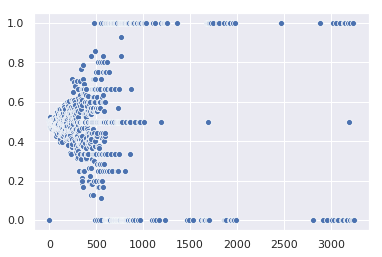

In [44]:
sns.scatterplot(data=match_df.groupby('WidthDelta')['WidthWinner'].mean())
#sns.distplot(match_df.groupby('HeightDelta')['HeightWinner'].mean().values)
#sns.distplot(match_df.groupby('WidthDelta')['WidthWinner'].mean().values)